# Figuring Out Which Customers May Leave - Churn Analysis

### About our Dataset
Source - https://www.kaggle.com/blastchar/telco-customer-churn
1. We have customer information for a Telecommunications company
2. We've got customer IDs, general customer info, the servies they've subscribed too, type of contract and monthly charges.
3. This is a historic customer information so we have a field stating whether that customer has **churnded**
**Field Descriptions**
- customerID - Customer ID
- gender - Whether the customer is a male or a female
- SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
- Partner - Whether the customer has a partner or not (Yes, No)
- Dependents - Whether the customer has dependents or not (Yes, No)
- tenure - Number of months the customer has stayed with the company
- PhoneService - Whether the customer has a phone service or not (Yes, No)
- MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract - The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod - The customer’s payment method (Electronic check, Mailed check Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - The amount charged to the customer monthly
- TotalCharges - The total amount charged to the customer
- Churn - Whether the customer churned or not (Yes or No)

***Customer Churn*** - churn is when an existing customer, user, player, subscriber or any kind of return client stops doing business or ends the relationship with a company.

**Aim -** is to figure our which customers may likely churn in future

In [1]:
# Load our data
import pandas as pd

# Uncomment this line if using this notebook locally
#churn_df = pd.read_csv('./data/churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

file_name = "https://raw.githubusercontent.com/soumyabrataroy/Customer_churn_prediction/main/WA_Fn-UseC_-Telco-Customer-Churn.csv"
churn_df = pd.read_csv(file_name)

# We use the dataframe name followed by a '.head()' to use the head function to
# preview the first 5 records of the dataframe. If you wanted to preview the first 10, simply
# put dataframe_name.head(10)
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Get summary stats on our numeric columns
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [3]:
# List unique values in the dataframe e.g. by doing df['name'] column
churn_df.SeniorCitizen.unique()

array([0, 1])

In [4]:
# View unique for Tenure, we can see this is a
churn_df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [5]:
len(churn_df.MonthlyCharges.unique())

1585

In [6]:
# Summarize our dataset
print ("Rows     : " ,churn_df.shape[0])
print ("Columns  : " ,churn_df.shape[1])
print ("\nFeatures : \n" ,churn_df.columns.tolist())
print ("\nMissing values :  ", churn_df.isnull().sum().values.sum())
print ("\nUnique values :  \n",churn_df.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [7]:
churn_df['Churn'].value_counts(sort = False)

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### Exploratory Data Analysis

In [8]:
# Keep a copy incase we need to look at the original dataset in future
churn_df_copy = churn_df.copy()

In [9]:
churn_df_copy.drop(['customerID','MonthlyCharges', 'TotalCharges', 'tenure'], axis=1, inplace=True)
churn_df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


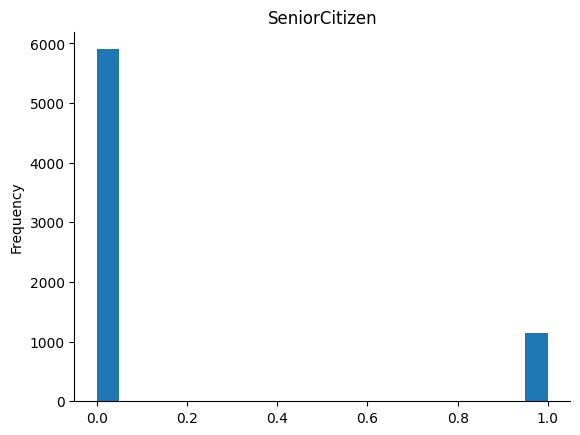

In [10]:
# @title SeniorCitizen

from matplotlib import pyplot as plt
churn_df_copy['SeniorCitizen'].plot(kind='hist', bins=20, title='SeniorCitizen')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
# Create a new dataset called summary so that we can summarize our churn data
# Crosstab - Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.
summary = pd.concat([pd.crosstab(churn_df_copy[x], churn_df_copy.Churn) for x in churn_df_copy.columns[:-1]], keys=churn_df_copy.columns[:-1])
summary

Churn                                         No   Yes
gender           Female                     2549   939
                 Male                       2625   930
SeniorCitizen    0                          4508  1393
                 1                           666   476
Partner          No                         2441  1200
                 Yes                        2733   669
Dependents       No                         3390  1543
                 Yes                        1784   326
PhoneService     No                          512   170
                 Yes                        4662  1699
MultipleLines    No                         2541   849
                 No phone service            512   170
                 Yes                        2121   850
InternetService  DSL                        1962   459
                 Fiber optic                1799  1297
                 No                         1413   113
OnlineSecurity   No                         2037  1461
                 No internet service        1413   113
                 Yes                        1724   295
OnlineBackup     No                         1855  1233
                 No internet service        1413   113
                 Yes                        1906   523
DeviceProtection No                         1884  1211
                 No internet service        1413   113
                 Yes                        1877   545
TechSupport      No                         2027  1446
                 No internet service        1413   113
                 Yes                        1734   310
StreamingTV      No                         1868   942
                 No internet service        1413   113
                 Yes                        1893   814
StreamingMovies  No                         1847   938
                 No internet service        1413   113
                 Yes                        1914   818
Contract         Month-to-month             2220  1655
                 One year                   1307   166
                 Two year                   1647    48
PaperlessBilling No                         2403   469
                 Yes                        2771  1400
PaymentMethod    Bank transfer (automatic)  1286   258
                 Credit card (automatic)    1290   232
                 Electronic check           1294  1071
                 Mailed check               1304   308

In [12]:
# Example of how Cross Tab works
# A crosstabulation (also known as a contingency table) shows the frequency between two variables. This is the default functionality for crosstab if given two columns.
import numpy as np

df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['X', 'Y', 'Z'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,X,foo,-0.416408,-0.025082
1,one,Y,foo,0.494697,-0.271312
2,two,Z,foo,-0.601807,-0.036335
3,three,X,bar,0.940415,-1.420888
4,one,Y,bar,-0.788129,-0.789147
5,one,Z,bar,-1.363828,0.406746
6,two,X,foo,0.824086,-1.245101
7,three,Y,foo,0.373131,-0.789437
8,one,Z,foo,0.463666,2.406260
9,one,X,bar,-0.506084,0.191400


In [13]:
# We get the frequency of the categories in B with categories in A
pd.crosstab(index = df.A, columns = df.B)

B,X,Y,Z
A,,,
one,2,2,2
three,1,1,1
two,1,1,1


### Let's make a percentage column

In [15]:
summary['Churn_Percentage'] = summary['Yes'] / (summary['No'] + summary['Yes'])
summary.sort_values(by='Churn_Percentage', ascending=False)

,Churn,No,Yes,Churn_Percentage
PaymentMethod,Electronic check,1294,1071,0.452854
Contract,Month-to-month,2220,1655,0.427097
InternetService,Fiber optic,1799,1297,0.418928
OnlineSecurity,No,2037,1461,0.417667
SeniorCitizen,1,666,476,0.416813
TechSupport,No,2027,1446,0.416355
OnlineBackup,No,1855,1233,0.399288
DeviceProtection,No,1884,1211,0.391276
StreamingMovies,No,1847,938,0.336804
PaperlessBilling,Yes,2771,1400,0.335651


### Visualizations and EDA

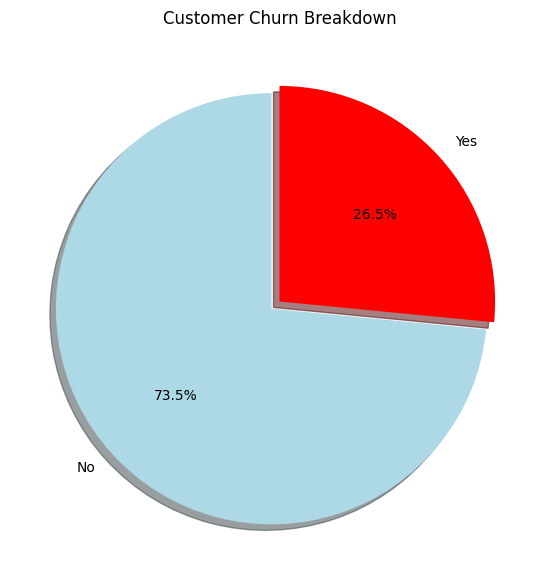

In [16]:
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from pylab import rcParams # Customize Matplotlib plots using rcParams

# Data to plot
labels = churn_df['Churn'].value_counts(sort = True).index
sizes = churn_df['Churn'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0)  # explode 1st slice

rcParams['figure.figsize'] = 7,7
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Customer Churn Breakdown')
plt.show()

<ipython-input-17-2a97a3b1dd6d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.violinplot(x="Churn", y = "MonthlyCharges",data = churn_df, palette = "Pastel1")


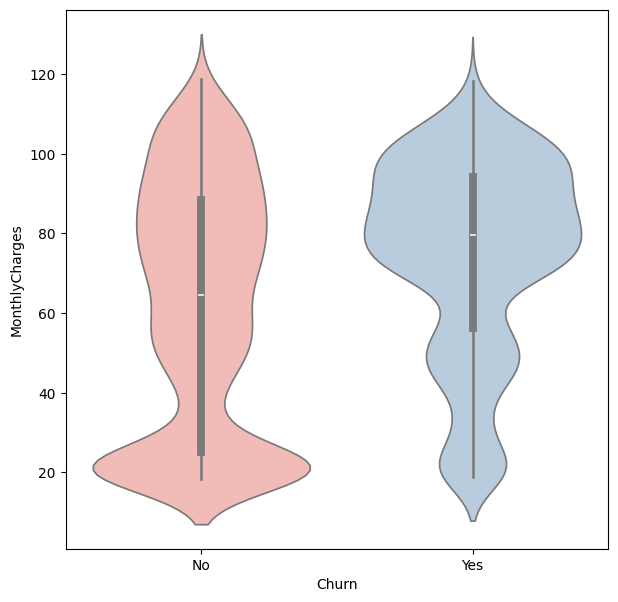

In [17]:
# Create a Volin Plot showing how monthy charges relate to Churn
# We can see that Churned customers tend to be higher paying customers
g = sns.violinplot(x="Churn", y = "MonthlyCharges",data = churn_df, palette = "Pastel1")

<ipython-input-23-d0157eccf860>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.violinplot(x="Churn", y = "tenure",data = churn_df, palette = "Pastel1")


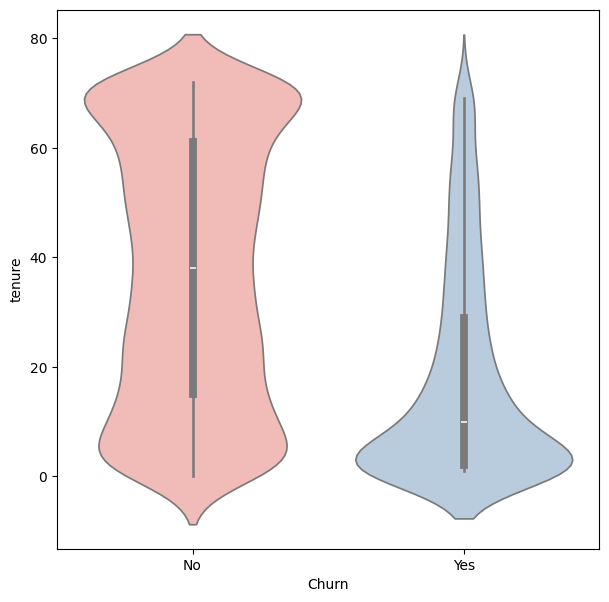

In [ ]:
# Let's look at Tenure
g = sns.violinplot(x="Churn", y = "tenure",data = churn_df, palette = "Pastel1")

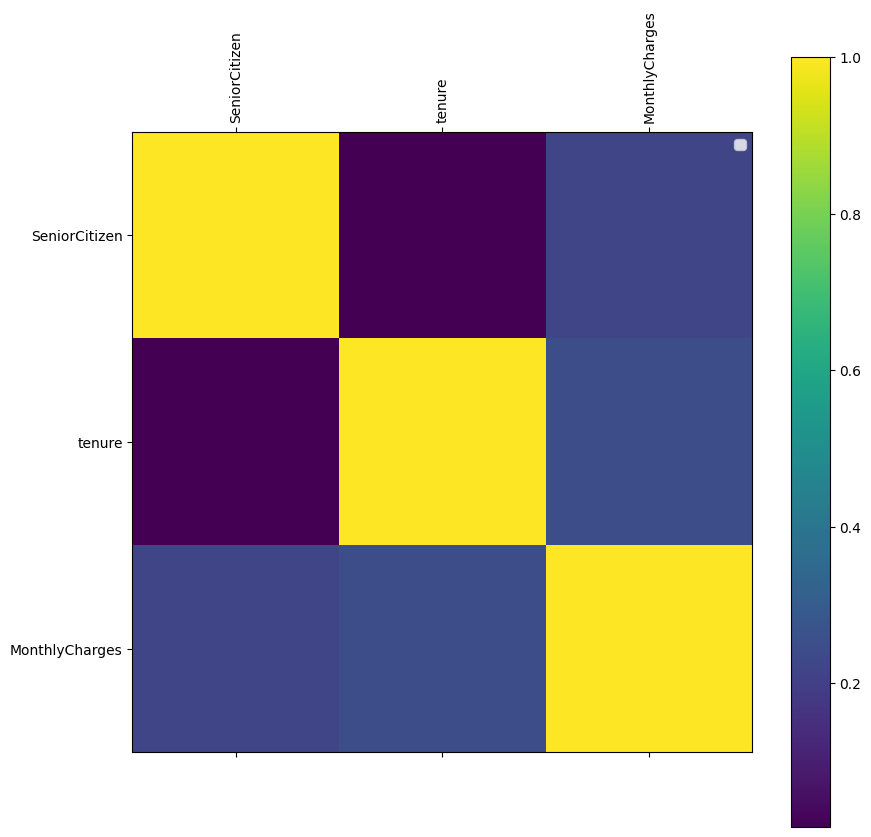

In [24]:
# Correlation plot doesn't end up being too informative
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr(numeric_only=True)
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(churn_df)

# Prepare Data for Machine Learning Classifer

In [25]:
# Check for empty fields, Note, " " is not Null but a spaced character
len(churn_df[churn_df['TotalCharges'] == " "])

11

In [26]:
## Drop missing data
churn_df = churn_df[churn_df['TotalCharges'] != " "]

In [27]:
len(churn_df[churn_df['TotalCharges'] == " "])

0

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col = ['customerID']

#Target columns
target_col = ["Churn"]

#categorical columns
cat_cols = churn_df.nunique()[churn_df.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]

#numerical columns
num_cols = [x for x in churn_df.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols = churn_df.nunique()[churn_df.nunique() == 2].keys().tolist()

#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    churn_df[i] = le.fit_transform(churn_df[i])

#Duplicating columns for multi value columns
churn_df = pd.get_dummies(data = churn_df, columns = multi_cols )
churn_df.head()

<ipython-input-28-6a4ca1435317>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df[i] = le.fit_transform(churn_df[i])
<ipython-input-28-6a4ca1435317>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df[i] = le.fit_transform(churn_df[i])
<ipython-input-28-6a4ca1435317>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,True,False,False,True,False,False,False,False,True,False


In [29]:
len(churn_df.columns)

42

In [30]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [32]:
# Scaling Numerical columns
std = StandardScaler()

# Scale data
scaled = std.fit_transform(churn_df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

# Dropping original values merging scaled values for numerical columns
df_telcom_og = churn_df.copy()
churn_df = churn_df.drop(columns = num_cols,axis = 1)
churn_df = churn_df.merge(scaled, left_index=True, right_index=True, how = "left")

# Churn_df.info()
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,1,0,False,True,...,True,False,False,False,False,True,False,-1.280696,-1.161509,-0.994437
1,5575-GNVDE,1,0,0,0,1,0,0,True,False,...,False,True,False,False,False,False,True,0.063761,-0.260626,-0.174153
2,3668-QPYBK,1,0,0,0,1,1,1,True,False,...,True,False,False,False,False,False,True,-1.239955,-0.363679,-0.959899
3,7795-CFOCW,1,0,0,0,0,0,0,False,True,...,False,True,False,True,False,False,False,0.511913,-0.747635,-0.195657
4,9237-HQITU,0,0,0,0,1,1,1,True,False,...,True,False,False,False,False,True,False,-1.239955,0.196464,-0.940712


In [33]:
churn_df.drop(['customerID'], axis=1, inplace=True)
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,False,True,False,...,True,False,False,False,False,True,False,-1.280696,-1.161509,-0.994437
1,1,0,0,0,1,0,0,True,False,False,...,False,True,False,False,False,False,True,0.063761,-0.260626,-0.174153
2,1,0,0,0,1,1,1,True,False,False,...,True,False,False,False,False,False,True,-1.239955,-0.363679,-0.959899
3,1,0,0,0,0,0,0,False,True,False,...,False,True,False,True,False,False,False,0.511913,-0.747635,-0.195657
4,0,0,0,0,1,1,1,True,False,False,...,True,False,False,False,False,True,False,-1.239955,0.196464,-0.940712


In [34]:
churn_df[churn_df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
7021,1,0,0,0,1,1,1,True,False,False,...,False,True,False,False,False,True,False,NaN,NaN,NaN
7022,1,0,0,0,1,1,0,False,False,True,...,False,True,False,False,False,True,False,NaN,NaN,NaN
7023,0,1,1,0,1,1,0,False,False,True,...,True,False,False,False,False,True,False,NaN,NaN,NaN
7024,1,0,1,0,1,1,0,False,False,True,...,True,False,False,False,True,False,False,NaN,NaN,NaN
7025,0,0,0,0,1,1,0,False,False,True,...,True,False,False,True,False,False,False,NaN,NaN,NaN
7026,0,0,0,0,1,1,1,True,False,False,...,True,False,False,True,False,False,False,NaN,NaN,NaN
7027,1,0,0,0,1,0,0,True,False,False,...,True,False,False,False,False,False,True,NaN,NaN,NaN
7028,0,0,1,0,1,0,0,True,False,False,...,False,False,True,True,False,False,False,NaN,NaN,NaN
7029,0,1,0,0,0,1,0,False,True,False,...,True,False,False,False,False,True,False,NaN,NaN,NaN
7030,0,0,0,0,1,1,0,True,False,False,...,True,False,False,False,False,False,True,NaN,NaN,NaN


In [ ]:
churn_df = churn_df.dropna()

In [ ]:
# Double check that nulls have been removed
churn_df[churn_df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges


# Modeling

In [46]:
from sklearn.model_selection import train_test_split

# We remove the label values from our training data
X = churn_df.drop(['Churn'], axis=1).values

# We assigned those label values to our Y dataset
y = churn_df['Churn'].values

In [47]:
churn_df['Churn'].value_counts()

Churn
0    5146
1    1864
Name: count, dtype: int64

In [45]:
churn_df = churn_df.dropna()

In [48]:
# Split it to a 70:30 Ratio Train:Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)

In [49]:
# undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_train, y_train = rus.fit_resample(X_train, y_train)

In [50]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0,0,0,0,1,0,True,False,False,True,...,False,True,False,False,True,False,False,1.611923,-1.331048,-0.187563
1,0,0,0,0,1,1,True,False,False,False,...,True,False,False,True,False,False,False,1.408218,-1.4956,-0.429195
2,0,0,1,1,1,0,True,False,False,True,...,False,False,True,False,True,False,False,-1.199214,0.301179,-0.920972
3,1,0,1,1,1,0,False,False,True,False,...,False,True,False,False,True,False,False,0.75636,1.504572,1.500643
4,0,1,0,0,1,0,True,False,False,False,...,True,False,False,False,False,True,False,-0.914026,-0.624636,-0.79054


In [51]:
print(len(churn_df.columns))
churn_df.columns

41


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_E

In [52]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,False,True,False,...,True,False,False,False,False,True,False,-1.280696,-1.161509,-0.994437
1,1,0,0,0,1,0,0,True,False,False,...,False,True,False,False,False,False,True,0.063761,-0.260626,-0.174153
2,1,0,0,0,1,1,1,True,False,False,...,True,False,False,False,False,False,True,-1.239955,-0.363679,-0.959899
3,1,0,0,0,0,0,0,False,True,False,...,False,True,False,True,False,False,False,0.511913,-0.747635,-0.195657
4,0,0,0,0,1,1,1,True,False,False,...,True,False,False,False,False,True,False,-1.239955,0.196464,-0.940712


# Fit a Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy = 0.7337137422729434
[[1082  462]
 [  98  461]]
              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1544
           1       0.50      0.82      0.62       559

    accuracy                           0.73      2103
   macro avg       0.71      0.76      0.71      2103
weighted avg       0.81      0.73      0.75      2103



## Feature Importance using Logistic Regression

In [54]:
# Let's see what features mattered most i.e. Feature Importance
# We sort on the co-efficients with the largest weights as those impact the resulting output the most
coef = model.coef_[0]
coef = [abs(number) for number in coef]
print(coef)

[0.06268975626637667, 0.1744915734473218, 0.2736541525917526, 0.018950574119084032, 0.09026749731318555, 0.2835784262679905, 0.026623267239485375, 0.08996437234869711, 0.06364423007426681, 0.3709181529201625, 0.4552953697328268, 0.08468034177767875, 0.29631188302137285, 0.08468034177767875, 0.2119346662079646, 0.23584935047813943, 0.08468034177767875, 0.15147213366540357, 0.19008355190158327, 0.08468034177767875, 0.10570633508900196, 0.16123631461441457, 0.08468034177767875, 0.07685909780202366, 0.07974848093744472, 0.08468034177767875, 0.16412569774957092, 0.0913123492995992, 0.08468034177767875, 0.17568956611261505, 1.163383543776039, 0.17204693507084537, 0.9916397336701726, 0.14137202997432802, 0.25473904514463047, 0.39183380002544393, 0.0039741501285006885, 0.004607555972451263, 0.0003249816525964838, 0.03649003624204235]


In [55]:
# Finding and deleting the label column
cols = list(churn_df.columns)
cols.index('Churn')

6

In [56]:
del cols[6]
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure',
 'MonthlyCharges',
 'Tota

In [57]:
# Sorting on Feature Importance
sorted_index = sorted(range(len(coef)), key = lambda k: coef[k], reverse = True)
for idx in sorted_index:
    print(cols[idx])

Contract_Month-to-month
Contract_Two year
InternetService_Fiber optic
PaymentMethod_Electronic check
InternetService_DSL
OnlineSecurity_No
PaperlessBilling
Partner
PaymentMethod_Credit card (automatic)
OnlineBackup_No
OnlineSecurity_Yes
DeviceProtection_No
StreamingMovies_Yes
SeniorCitizen
Contract_One year
StreamingTV_Yes
TechSupport_No
OnlineBackup_Yes
PaymentMethod_Bank transfer (automatic)
DeviceProtection_Yes
StreamingMovies_No
PhoneService
MultipleLines_No phone service
InternetService_No
OnlineSecurity_No internet service
OnlineBackup_No internet service
DeviceProtection_No internet service
TechSupport_No internet service
StreamingTV_No internet service
StreamingMovies_No internet service
StreamingTV_No
TechSupport_Yes
MultipleLines_Yes
gender
TotalCharges
MultipleLines_No
Dependents
tenure
PaymentMethod_Mailed check
MonthlyCharges


# Try Random Forests

In [58]:
# Let's try Random Forests now to see if our resutls get better
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

predictions = model_rf.predict(X_test)
score = model_rf.score(X_test, y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy = 0.719923918212078
[[1061  483]
 [ 106  453]]
              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1544
           1       0.48      0.81      0.61       559

    accuracy                           0.72      2103
   macro avg       0.70      0.75      0.69      2103
weighted avg       0.80      0.72      0.74      2103



# Saving & Loading Models

In [59]:
import pickle

# save
with open('model.pkl','wb') as f:
    pickle.dump(model_rf, f)

# load
with open('model.pkl', 'rb') as f:
    loaded_model_rf = pickle.load(f)

In [60]:
predictions = loaded_model_rf.predict(X_test)